In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")

sns.set(style="whitegrid", color_codes=True)

# What is Logistic Regression ?

Logistic Regression is a statistical model that is used in classification and predictive analysis. This model is also know as Logit and it is characterized by a single binary dependent variable, i. e. a variable that only can take two values, often labeled as 0 and 1. Binary values are widely udsed in statistics to model the probablity of a certain event occuring, such as the probability of a pacient being health, a tumor being malignant or not, if an email is spam or not and if a team win or loose. Therefore, Logistic Regression has a large variety of applications.

The logistic function is defined by:

$$ p(x) = \dfrac{1}{1+e^{-(x-\mu)/s}} $$
where $\mu$ is the midpoint of the curve ($p(\mu)=1/2$) and $s$ a scale parameter that determines the spread of the probability distribution. This function is also called **sigmoid function**, because of its 's' shape.

$$ p(x) = \dfrac{1}{1+e^{-(\beta_0 + \beta_1 x)}} \,,$$ 
where $\beta_0 = -\mu/s$ is the intercept of the line $y = \beta_0 + \beta_1 x$ and $\beta_1 = 1/s$ is its slope. The parameter $\beta_0$ is also called "bias" and $\beta_1$ "weights". The particular values of these quantities that maximizes the likelyhood function are what we need to find to make predictions.

## Creating a sigmoid function

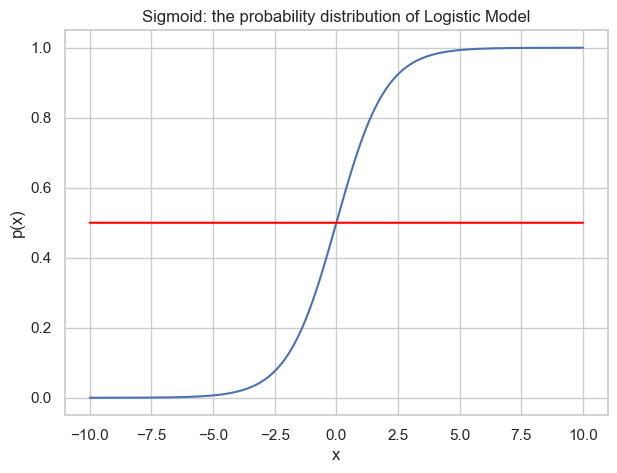

In [2]:
import numpy as np # Importing a linear algebra package

def sigmoid(beta_1, beta_0, x):
    return 1/(1+np.exp(-(beta_1*x-beta_0)))

# Creating a Plot through the above Described Sigmoid Function
x = np.linspace(-10,10,10000) # -10 to 10 -> equivalently spaced 10,000
y = sigmoid(1,0,x)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.plot(x, np.zeros(shape=x.shape) + 0.5, color='red')
plt.title("Sigmoid: the probability distribution of Logistic Model")
plt.xlabel(xlabel="x")
plt.ylabel(ylabel="p(x)")
plt.show()

# Importing Datasets

In [3]:
import pandas as pd

test_df = pd.read_csv('./data/Titanic Dataset/test.csv')
train_df = pd.read_csv('./data/Titanic Dataset/train.csv')
result_df = pd.read_csv('./data/Titanic Dataset/gender_submission.csv')

In [4]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(f"Number of Samples in the Train Data is {train_df.shape[0]} and the corresponding features are {train_df.shape[1]-1}.")
print(f"Number of Samples in the Test Data is {test_df.shape[0]} and the corresponding features are {test_df.shape[1]}.")

Number of Samples in the Train Data is 891 and the corresponding features are 11.
Number of Samples in the Test Data is 418 and the corresponding features are 11.


In [7]:
result_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Quality and Missing Value Assessment

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Age Analysis

In [9]:
train_df['Age'].mean(), np.median(train_df.loc[~train_df.Age.isnull(), "Age"])
test_df['Age'].mean(), np.median(test_df.loc[~test_df.Age.isnull(), "Age"])
# train_df.Age.min(),train_df.Age.max() 

(30.272590361445783, 27.0)

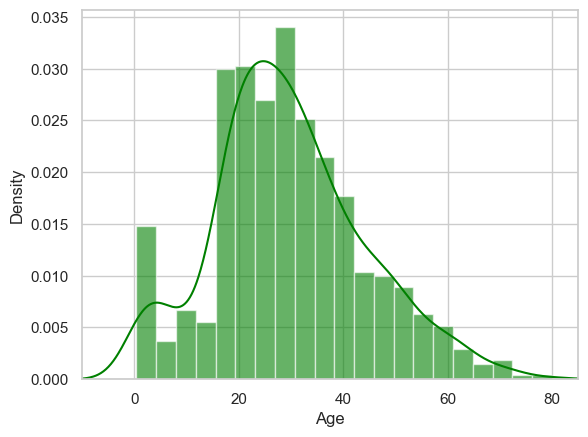

In [10]:
ax = train_df.Age.hist(bins=21, density=True, stacked=True, color="green", alpha=0.6)
train_df.Age.plot(kind='density', color='green')
ax.set(xlabel="Age")
plt.xlim(-10, 85)
plt.show()

In [11]:
train_df.loc[train_df.Age.isnull(), "Age"] = np.median(train_df.loc[~train_df.Age.isnull(), "Age"])
test_df.loc[test_df.Age.isnull(), "Age"] = np.median(test_df.loc[~test_df.Age.isnull(), "Age"])

## Cabin Analysis

In [12]:
f"Percentage of Missing 'Cabin' Records is %.2f%%." % ((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100)

"Percentage of Missing 'Cabin' Records is 77.10%."

In [13]:
# Dropping Data
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

## Embarked Analysis

In [14]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


In [15]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

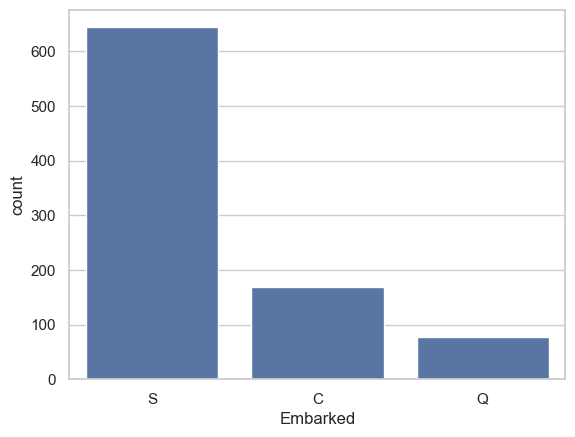

In [16]:
sns.countplot(x='Embarked', data=train_df)
plt.show()

In [17]:
train_df.loc[train_df.Embarked.isnull(), 'Embarked'] = 'S'

In [18]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

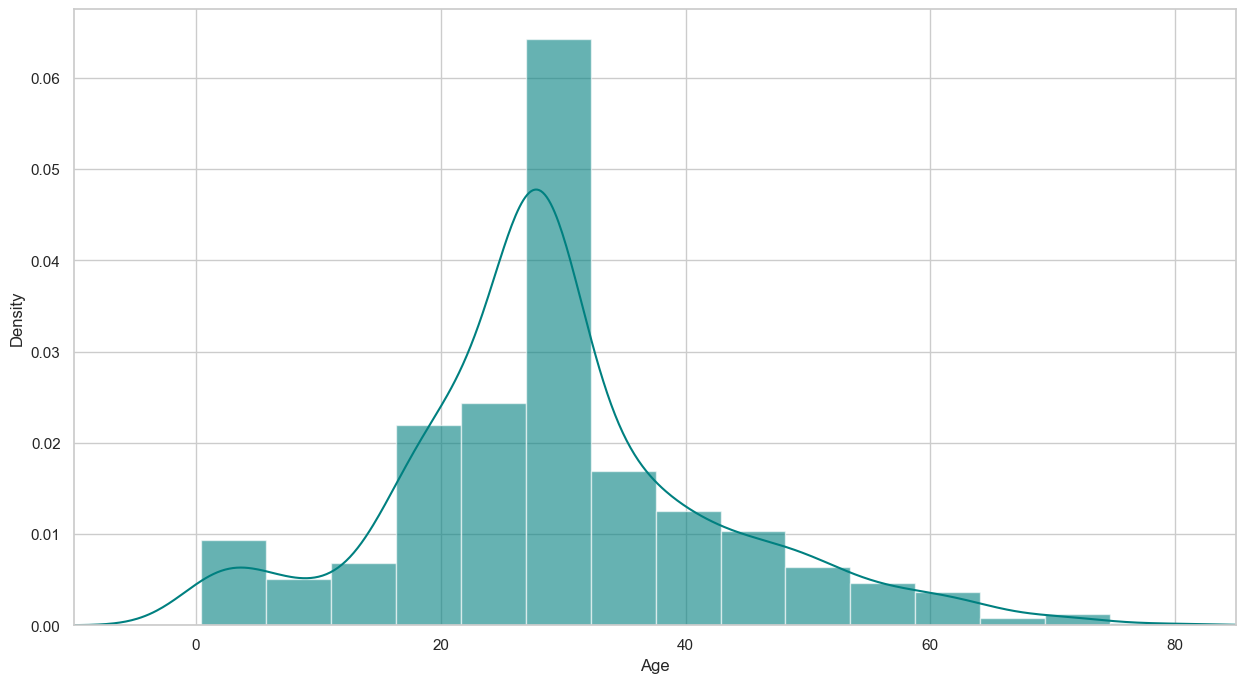

In [19]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [20]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Feature Engineering

In [21]:
train_df['TravelAlone'] = np.where((train_df["SibSp"]+train_df.Parch) > 0, 0, 1)

In [22]:
test_df['TravelAlone'] = np.where((test_df["SibSp"]+test_df.Parch) > 0, 0, 1)

In [23]:
train_df.drop(['SibSp', 'Parch'] ,axis=1 ,inplace=True)
test_df.drop(['SibSp', 'Parch'] ,axis=1 ,inplace=True)

## Dropping Unrequired Features ...

In [24]:
train_df=pd.get_dummies(train_df, columns=["Pclass","Embarked","Sex"])

In [25]:
train_df.drop(['Sex_female', 'PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [26]:
train_df

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,False,True,False,False,False,True,True
887,1,19.0,30.0000,1,True,False,False,False,False,True,False
888,0,28.0,23.4500,0,False,False,True,False,False,True,False
889,1,26.0,30.0000,1,True,False,False,True,False,False,True


In [27]:
test_df = pd.get_dummies(test_df, columns=["Pclass","Embarked","Sex"])

In [28]:
test_df.drop(['Sex_female', 'PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [29]:
test_df

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,1,False,False,True,False,False,True,True
414,39.0,108.9000,1,True,False,False,True,False,False,False
415,38.5,7.2500,1,False,False,True,False,False,True,True
416,27.0,8.0500,1,False,False,True,False,False,True,True


# Modeling

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [31]:
cols = ['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'TravelAlone']

In [45]:
X = train_df[cols]
y = train_df['Survived']

model = LogisticRegression()
rfe = RFE(model, step=8)
rfe.fit(X, y)

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Pclass_1', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Sex_male']


C:\Users\Sahil\.virtualenvs\AI_Classes_Notebooks-1YgNpS1T\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

C:\Users\Sahil\.virtualenvs\AI_Classes_Notebooks-1YgNpS1T\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil\.virtualenvs\AI_Classes_Notebooks-1YgNpS1T\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')